In [4]:
import pandas as pd
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [5]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
print(f"Largest value for the tesla in web search : {df_tesla.TSLA_WEB_SEARCH.max()}")
print(f"Lowest value for the tesla in web search : {df_tesla.TSLA_WEB_SEARCH.min()}")

Largest value for the tesla in web search : 31
Lowest value for the tesla in web search : 2


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [11]:
df_unemployment = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-20.csv')
print(df_unemployment.shape)
df_unemployment.head()

(200, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [13]:
print(f'Largest value for the unemployemt in web search : {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')


Largest value for the unemployemt in web search : 100


In [15]:
df_btc_price = pd.read_csv('/content/Bitcoin Search Trend.csv')
print(df_btc_price.shape)
df_btc_price.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [16]:
df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [18]:
df_btc_search = pd.read_csv('/content/Bitcoin Search Trend.csv')
print(f'Largest BTC news search : {df_btc_search.BTC_NEWS_SEARCH.max()}')

Largest BTC news search : 100


In [3]:
import pandas as pd
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_tesla.head()
df_unemployment = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-20.csv')
print(df_unemployment.shape)
df_unemployment.head()
df_btc_price = pd.read_csv('/content/Bitcoin Search Trend.csv')
print(df_btc_price.shape)
df_btc_price.head()

# Use .any().any() to check for any missing values in the entire DataFrame
print(f'Missing values for Tesla : {df_tesla.isna().any().any()}')
print(f'Missing values for  U/E : {df_unemployment.isna().any().any()}')
# Make sure df_btc_search is defined before checking for missing values
df_btc_search = pd.read_csv('/content/Bitcoin Search Trend.csv')
print(f'Missing values for BTC search : {df_btc_search.isna().any().any()}')

(200, 3)
(73, 2)
Missing values for Tesla : False
Missing values for  U/E : False
Missing values for BTC search : False


In [4]:
print(f'Missing values? for BTC price ? : {df_btc_price.isna().values.any()}')

Missing values? for BTC price ? : False


In [7]:
df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')

# Now you can check for missing values and filter:
print(f'Number of missing values : {df_btc_price.isna().values.max()}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values : True


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [20]:
df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')  # Re-initialize the DataFrame
df_btc_price = df_btc_price.dropna()

In [24]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
# Now proceed with converting the 'DATE' column to datetime
import pandas as pd
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [26]:
df_tesla.MONTH.head()

,MONTH
0,2010-06-01
1,2010-07-01
2,2010-08-01
3,2010-09-01
4,2010-10-01


In [27]:
df_btc_monthly = df_btc_price.resample('M', on = 'DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [28]:
df_btc_monthly = df_btc_price.resample('M', on = 'DATE').mean()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07


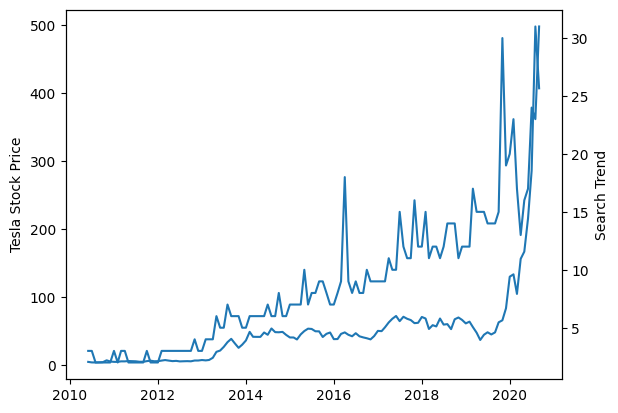

In [33]:
import matplotlib.pyplot as plt
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Tesla Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

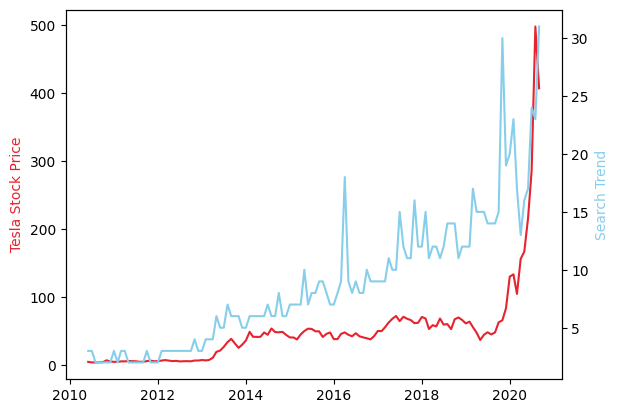

In [34]:
import matplotlib.pyplot as plt
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Tesla Stock Price', color = "#E6232E")
ax2.set_ylabel('Search Trend', color = "skyblue")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color ="#E6232E" )
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color ="skyblue")

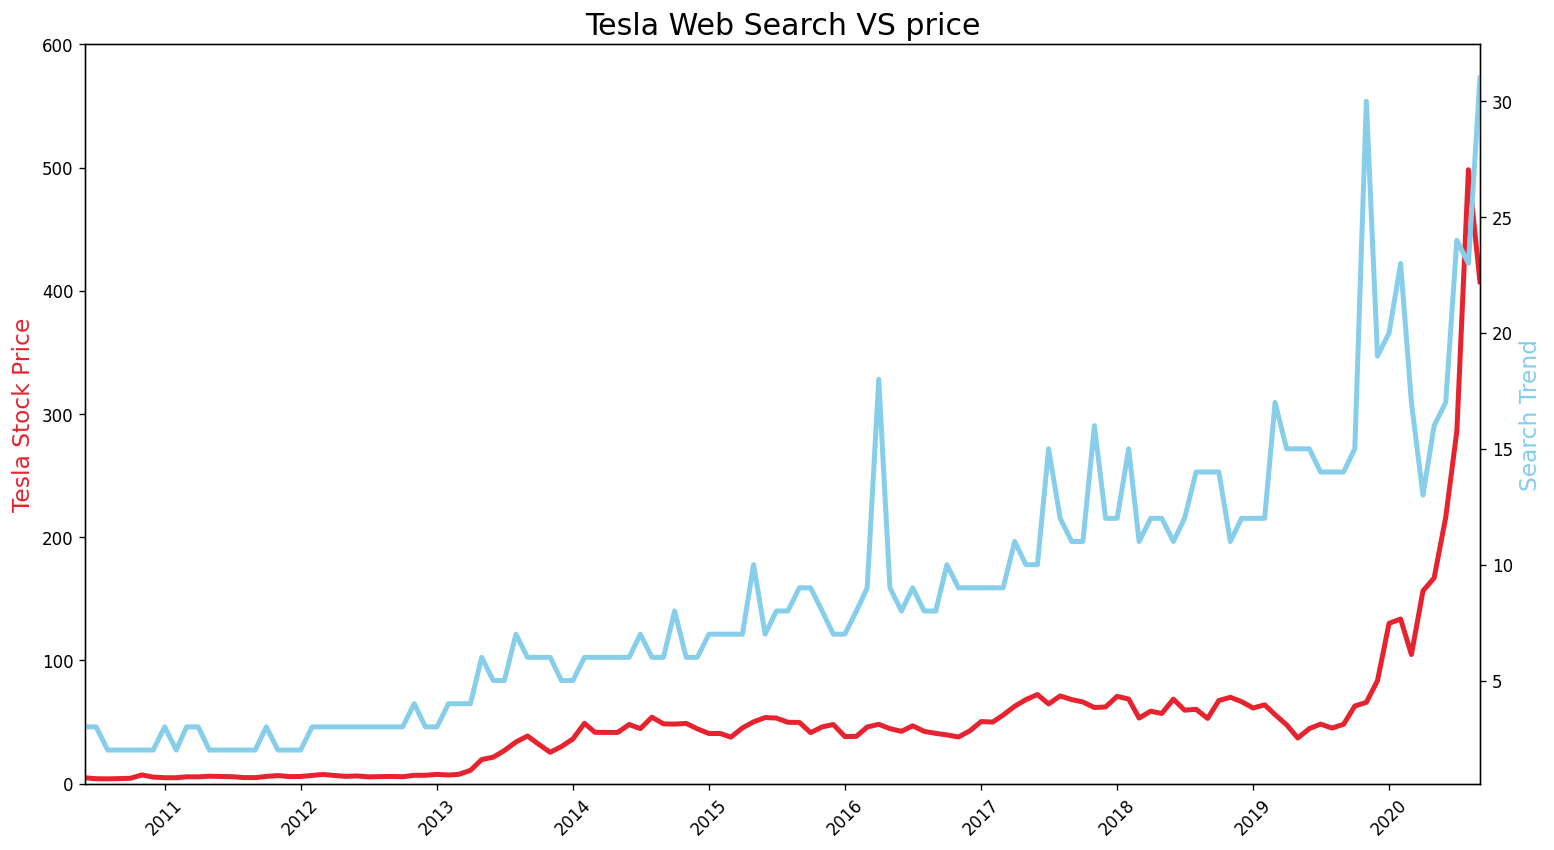

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8), dpi = 120)
plt.title('Tesla Web Search VS price', fontsize =18)

plt.xticks(rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Tesla Stock Price', color = "#E6232E", fontsize = 14)
ax2.set_ylabel('Search Trend', color = "skyblue", fontsize = 14)

ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(),df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color ="#E6232E",linewidth = 3 )
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color ="skyblue",linewidth = 3)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
years = mdates.YearLocator()  # Instantiate the YearLocator class
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

Largest BTC news search : 100


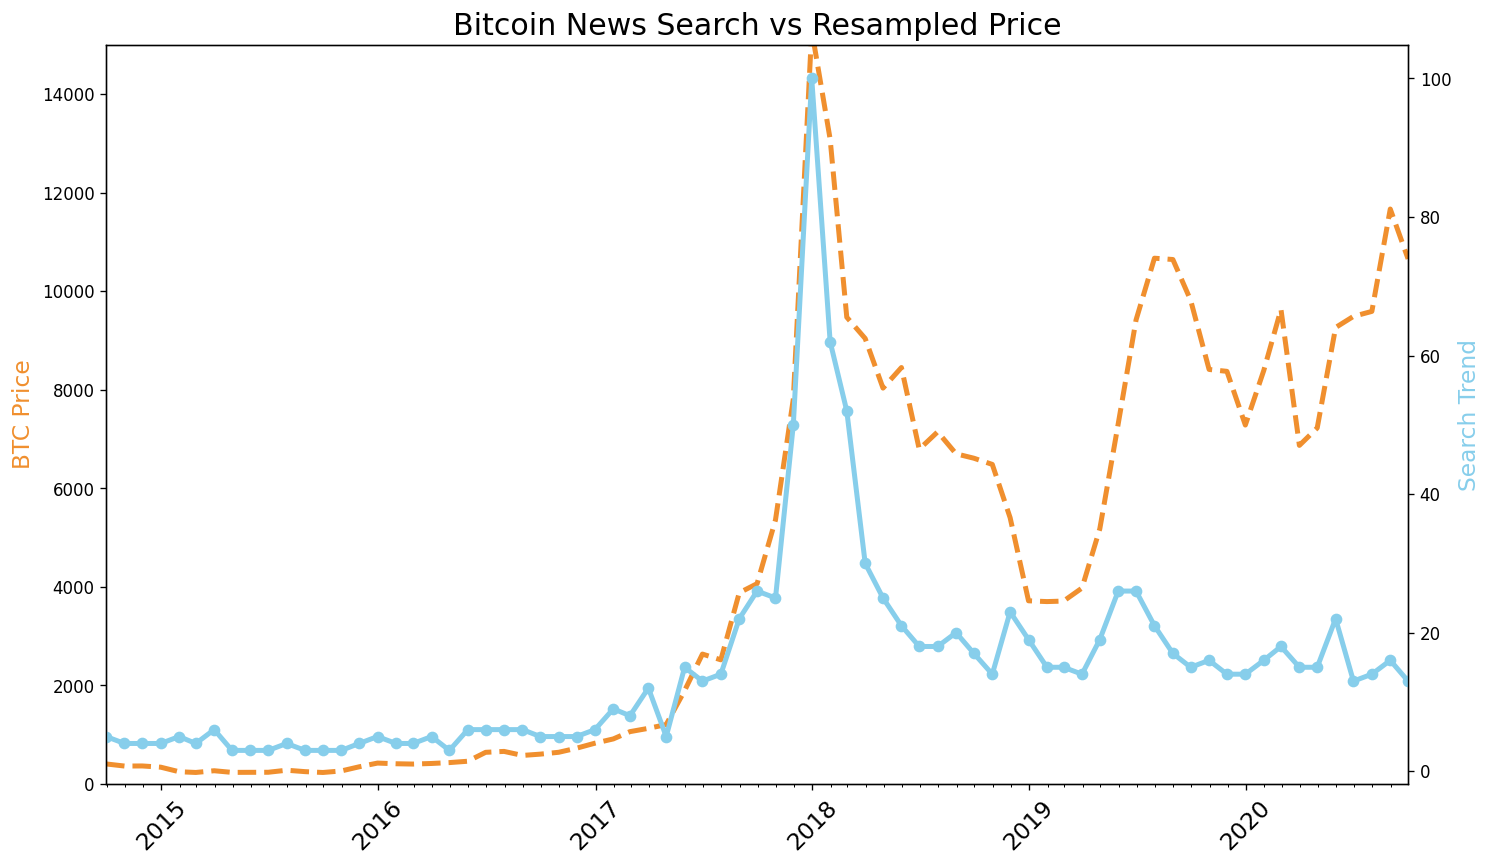

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')
df_btc_search = pd.read_csv('/content/Bitcoin Search Trend.csv')

# Convert the 'DATE' column to datetime object
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

# Set 'DATE' as the index
df_btc_price = df_btc_price.set_index('DATE')

print(f'Largest BTC news search : {df_btc_search.BTC_NEWS_SEARCH.max()}')

# Now you can resample
df_btc_monthly = df_btc_price.resample('M').mean()
df_btc_monthly.head()

plt.figure(figsize=(14,8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
         color='skyblue', linewidth=3, marker='o')

plt.show()

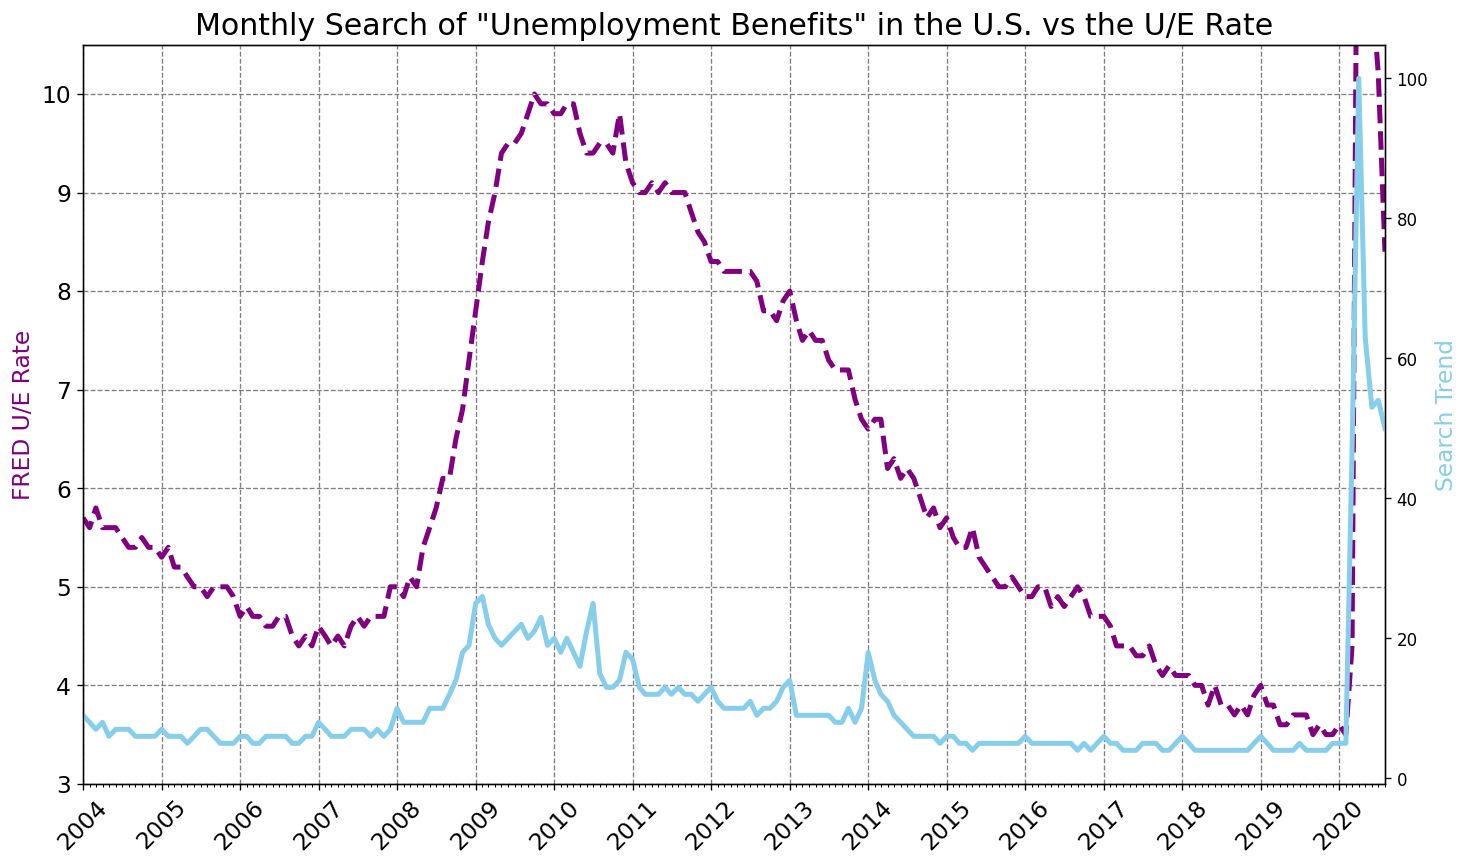

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()


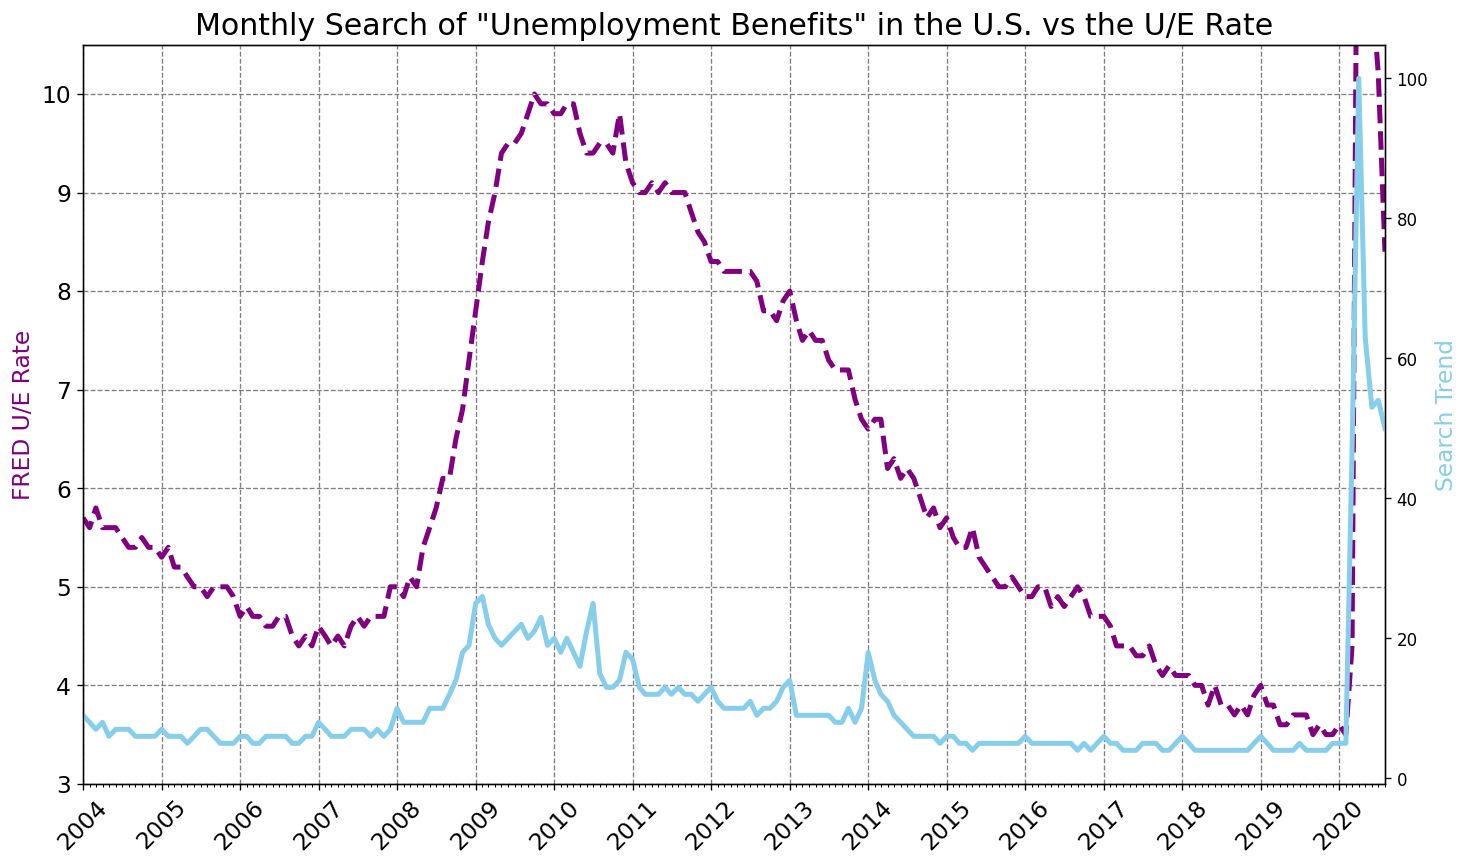

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

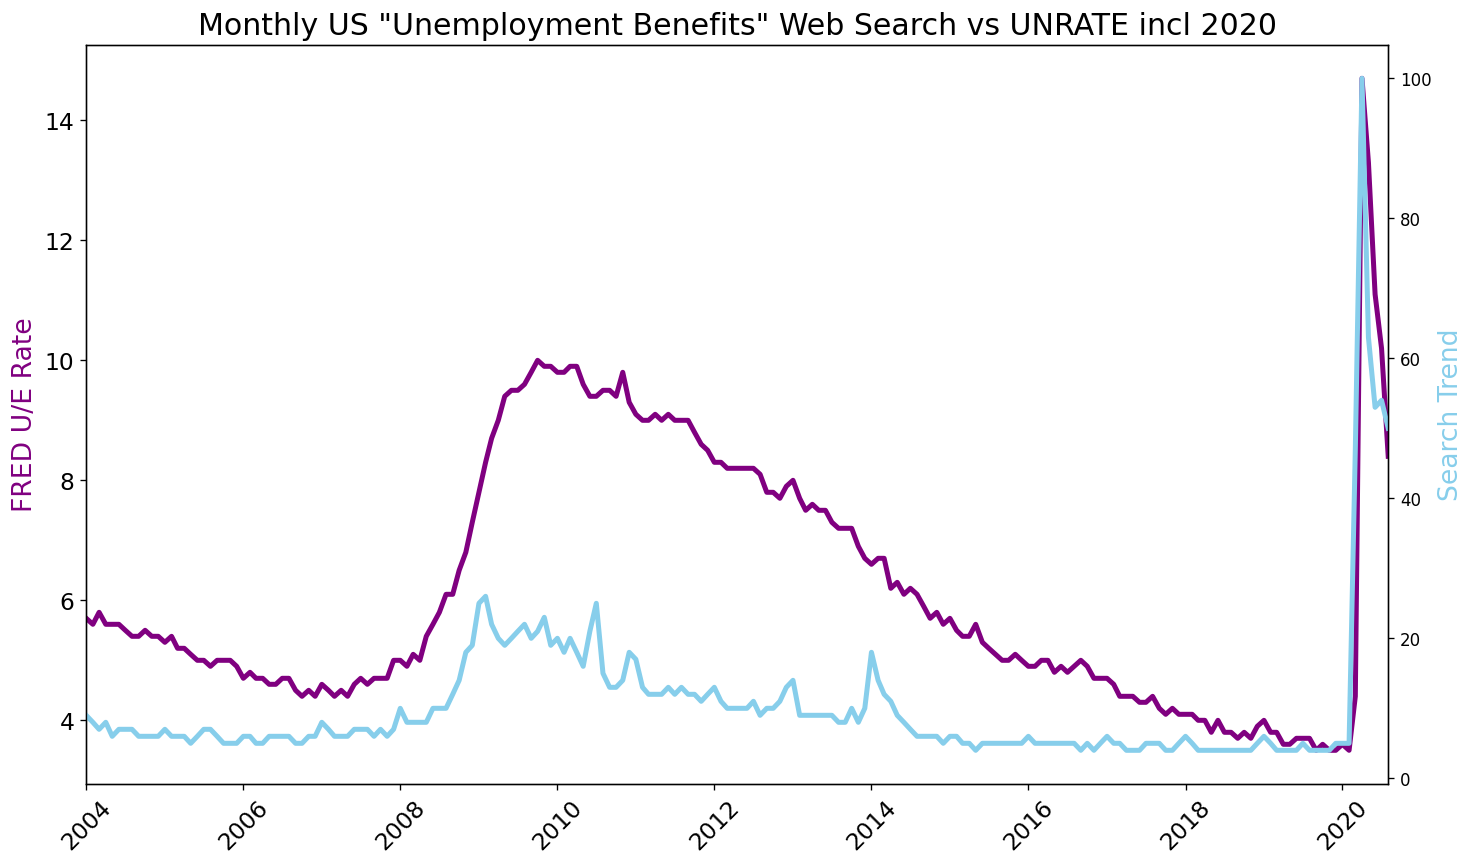

In [14]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()